
# Diseño de software
----

## Clases en el mundo real

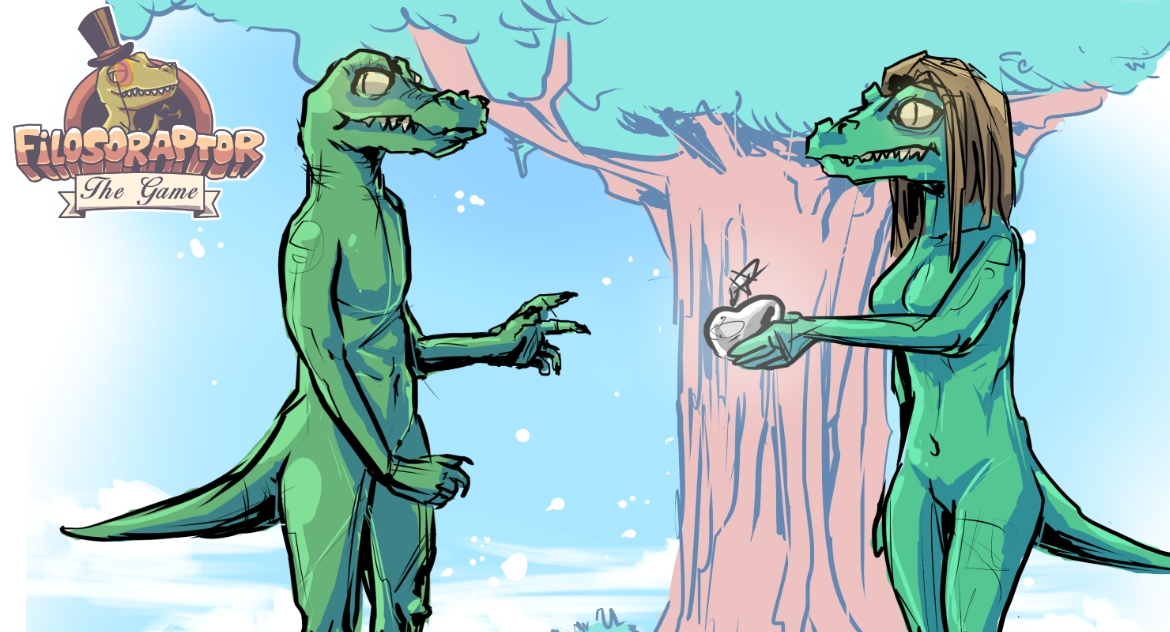


### namedtuples

In [1]:
from collections import namedtuple

Coso = namedtuple("Coso", ["a", "b"])

c  = Coso(a=1, b=2)
c

Coso(a=1, b=2)

### dataclass

In [2]:
import dataclasses

@dataclasses.dataclass
class InventoryItem:
    '''Class for keeping track of an item in inventory.'''
    name: str
    unit_price: float
    quantity_on_hand: int = 0

In [3]:
InventoryItem(name="tito", unit_price=43)

InventoryItem(name='tito', unit_price=43, quantity_on_hand=0)

In [4]:
InventoryItem(name=23, unit_price=43)

InventoryItem(name=23, unit_price=43, quantity_on_hand=0)

### dataclass

In [5]:
import dataclasses

@dataclasses.dataclass
class InventoryItem:
    '''Class for keeping track of an item in inventory.'''
    name: str
    unit_price: float
    quantity_on_hand: int = 0
    discount_20p: float = dataclasses.field(init=False)
        
    def __post_init__(self):
        self.discount_20p = self.unit_price * 0.2
    
InventoryItem(name=23, unit_price=43)

InventoryItem(name=23, unit_price=43, quantity_on_hand=0, discount_20p=8.6)

## Classes en el mundo real
----

### attrs

In [6]:
!pip install attrs -U


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import attrs

@attrs.define
class SomeClass:
    a_number = attrs.field(default=42)
    list_of_numbers: list = attrs.field(factory=list)
    
    @a_number.validator
    def must_be_a_number(self, attribute, value):
        if not isinstance(value, (int, float)):
            raise TypeError()
            
    def hard_math(self, another_number):
        return self.a_number + sum(self.list_of_numbers) * another_number

sc = SomeClass(1, {1, 2, 3})
sc

SomeClass(a_number=1, list_of_numbers={1, 2, 3})

In [8]:
sc.hard_math(23)

139

### attrs - Privados

In [9]:
@attrs.define
class C(object):
    _x = attrs.field(repr=False)
    y = attrs.field()
    

C(x=1, y=2)

C(y=2)

### attrs -  Privados auto-inicializados

In [10]:
@attrs.define
class C(object):
    _x = attrs.field(init=False, default=42)
    y = attrs.field()
C(34)

C(_x=42, y=34)

### attrs -  Keyword only

In [11]:
@attrs.define
class A:
    a = attrs.field()

A(a=1)
A(1)

A(a=1)

### attrs - Utilidades

In [12]:
@attrs.define
class Coordinates:
    x = attrs.field()
    y = attrs.field()

attrs.asdict(Coordinates(x=1, y=2))
{'x': 1, 'y': 2}

{'x': 1, 'y': 2}

In [13]:
@attrs.define
class C1:
    x = attrs.field()
    y = attrs.field()
    
C2 = attrs.make_class("C2", ["x", "y"])

attrs.fields(C1) == attrs.fields(C2)

True

### attrs - Inmutabilidad

In [14]:
@attrs.define(frozen=True)
class C:
    x = attrs.field()

i = C(1)
i.x = 2

FrozenInstanceError: 

### attrs - Inicializacion por defecto basada en otros parámetros

In [15]:
@attrs.define
class ConCoordinates:
    
    x = attrs.field()
    y = attrs.field()
    coordinates = attrs.field(init=False)

    @coordinates.default
    def _coordinates_default(self):
        return Coordinates(x=self.x, y=self.y)

In [16]:
ConCoordinates(x=23, y=21)

ConCoordinates(x=23, y=21, coordinates=Coordinates(x=23, y=21))

## attrs - Converters

In [17]:
@attrs.define
class C:
    x: int = attrs.field(converter=int)
        
C(1.1)

C(x=1)

## attrs - Validators

In [18]:
@attrs.define
class C:
    x: int = attrs.field(converter=int)
        
    @x.validator
    def _x_validator(self, name, value):
        assert self.x > 1
        
C(2)

C(x=2)

## attrs - Validators

Como funciones

In [19]:
def gt_1(instance, field, value):
    if value <= 1:
        raise ValueError(f"{field.name!r} must be gt 1")

@attrs.define
class C:
    x: int = attrs.field(converter=int, validator=gt_1)
    y: int = attrs.field(converter=int, validator=gt_1)
     
        
C(2, 1)

ValueError: 'y' must be gt 1

## attrs - Inicializacion libre - `post-init`



In [20]:
@attrs.define
class C:
    x: int
    y: int = attrs.field(init=False)

    def __attrs_post_init__(self):
        self.y = self.x + 1

C(1)

C(x=1, y=2)

## attrs - Inicializacion libre - `post-init`

Si es `frozen`Ojo!

In [21]:
@attrs.define(frozen=True)
class C:
    x: int
    y: int = attrs.field(init=False)

    def __attrs_post_init__(self):
        self.y = self.x + 1

C(1)

FrozenInstanceError: 

## attrs - Inicializacion libre - `post-init`

Si es `frozen`Ojo! - **solución**

In [22]:
@attrs.define(frozen=True)
class C:
    x: int
    y: int = attrs.field(init=False)

    def __attrs_post_init__(self):
        super().__setattr__("y", self.x + 1)
        

C(1)

C(x=1, y=2)

## attrs - Inicializacion libre - `pre-init`

The sole reason for the existence of __attrs_pre_init__ is to give users the chance to call super().__init__(), because some subclassing-based APIs require that.

In [23]:
class Base:
    def __init__(self):
        print("iniciando")


@attrs.define
class C(Base):
    x: int
    def __attrs_pre_init__(self):
        super().__init__()
        
C(1)

iniciando


C(x=1)

# Uttrs: Units + Attrs

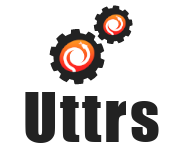

In [24]:
!pip install uttrs


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


## Uttrs: Ejemplo

In [25]:
from astropy import units as u
import uttr
import attrs

@uttr.s
class Galaxy:
    x = uttr.ib(unit=u.kpc)
    y = uttr.ib(unit=u.kpc)
    z = uttr.ib(unit=u.kpc)

    vx = uttr.ib(unit=u.km / u.s)
    vy = uttr.ib(unit=u.km / u.s)
    vz = uttr.ib(unit=u.km / u.s)

    m = uttr.ib(unit=u.M_sun)

    notes = attrs.field(validator=attrs.validators.instance_of(str))
    
gal = Galaxy(
    x=[1, 1, 3, 4],
    y=[10, 2, 3, 100],
    z=[1000, 1000, 1000, 1000] * u.parsec,
    vx=[1000, 1023, 2346, 1334],
    vy=[9956, 833, 954, 1024] * (u.km / u.h),
    vz=[1253, 956, 1054, 3568],
    m=[200, 100, 20, 5] * u.kg,
    notes="A random galaxy with arbitrary numbers.",
)
gal

Galaxy(x=<Quantity [1., 1., 3., 4.] kpc>, y=<Quantity [ 10.,   2.,   3., 100.] kpc>, z=<Quantity [1000., 1000., 1000., 1000.] pc>, vx=<Quantity [1000., 1023., 2346., 1334.] km / s>, vy=<Quantity [9956.,  833.,  954., 1024.] km / h>, vz=<Quantity [1253.,  956., 1054., 3568.] km / s>, m=<Quantity [200., 100.,  20.,   5.] kg>, notes='A random galaxy with arbitrary numbers.')

# Uttrs: Units + Attrs

Cada atributo tiene acceso a todas las funcionalidades de units

In [26]:
gal.x

<Quantity [1., 1., 3., 4.] kpc>

In [27]:
gal.vy.to(u.m / u.ms)

<Quantity [2.76555556, 0.23138889, 0.265     , 0.28444444] m / ms>

In [28]:
gal.vx.to_value()

array([1000., 1023., 2346., 1334.])

# Uttrs: Units + Attrs

Las unidades son lentas.
Se agrega un atributo de clase extra llamado "arr_" que permite acceder a todas las `uttr.ib` como numpy array

In [29]:
gal.arr_.x, gal.x.to_value()  # equivalente

(array([1., 1., 3., 4.]), array([1., 1., 3., 4.]))

# Uttrs: Units + Attrs

Las unidades son lentas.
Se agrega un atributo de clase extra llamado "arr_" que permite acceder a todas las `uttr.ib` como numpy array

In [30]:
import numpy as np

@uttr.s
class Galaxy:
    x = uttr.ib(unit=u.kpc)
    y = uttr.ib(unit=u.kpc)
    z = uttr.ib(unit=u.kpc)

    vx = uttr.ib(unit=u.km / u.s)
    vy = uttr.ib(unit=u.km / u.s)
    vz = uttr.ib(unit=u.km / u.s)

    m = uttr.ib(unit=u.M_sun)

    notes = attrs.field(validator=attrs.validators.instance_of(str))
    
    def mean(self):
        x = np.mean(self.arr_.x)
        y = np.mean(self.arr_.y)
        z = np.mean(self.arr_.z)

        vx = np.mean(self.arr_.vx)
        vy = np.mean(self.arr_.vy)
        vz = np.mean(self.arr_.vz)

        m = np.mean(self.arr_.m)

        return Galaxy(
            x=x, y=y, z=z, vx=vx, vy=vy, vz=vz, m=m, notes=self.notes
        )

# Uttrs: Units + Attrs

Las unidades son lentas.
Se agrega un atributo de clase extra llamado "arr_" que permite acceder a todas las `uttr.ib` como numpy array

In [31]:
gal = Galaxy(
    x=[1, 1, 3, 4],
    y=[10, 2, 3, 100],
    z=[1000, 1000, 1000, 1000] * u.parsec,
    vx=[1000, 1023, 2346, 1334],
    vy=[9956, 833, 954, 1024] * (u.km / u.h),
    vz=[1253, 956, 1054, 3568],
    m=[200, 100, 20, 5] * u.kg,
    notes="A random galaxy with arbitrary numbers.",
)

gal.mean()

Galaxy(x=<Quantity 2.25 kpc>, y=<Quantity 28.75 kpc>, z=<Quantity 1. kpc>, vx=<Quantity 1425.75 km / s>, vy=<Quantity 0.88659722 km / s>, vz=<Quantity 1707.75 km / s>, m=<Quantity 4.08617968e-29 solMass>, notes='A random galaxy with arbitrary numbers.')